# Meat Quality Assessment Model

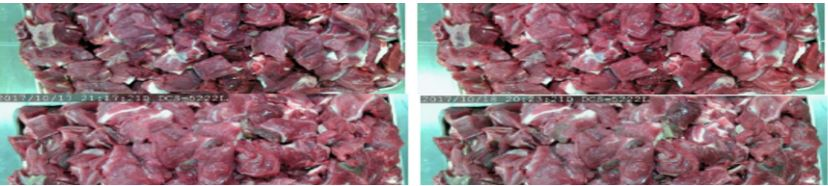


# Introduction
​
Meat Quality Assessment Model is a Machine Learning based frame work model which will predict whether a given image of meat is spoiled or fresh. Let's have a talk about the dataset.
​
# Dataset
​
The dataset for this project is taken from the Kaggle website. Here is the link for the dataset,https://www.kaggle.com/datasets/crowww/meat-quality-assessment-based-on-deep-learning
This dataset contains 2 classes, fresh and spoiled red meat samples collected from a supermarket in Izmir, Turkey for a university-industry collaboration project at Izmir University of Economics, and this work was published in ASYU 2019.Images were collected via an IP camera and the resolution of the images are 1280 x 720. There are 1896 images in total, 948 per class.
​
If you use this dataset in your work, please consider to cite:
​
O.Ulucan , D.Karakaya and M.Turkan.(2019) Meat quality assessment based on deep learning. In Conf. Innovations Intell. Syst. Appli. (ASYU)
​
# Goal
​
The goal of this project is to build a machine learning model with highest accuracy, which will predict whether the meat is spoiled or fresh with the help of image.
​
# Approach
​
In this notebook we will implement various approaches and compare their accuracy with the help of dataset each approach will be divided into different section. For each approach EDA and all techniques of training and testing will be done seperately. 

# Approach Using CNN
A Convolutional Neural Network is a type of neural network that is used in Computer Vision and Natural Language Processing tasks quite often due to the fact that it can learn to extract relevant features from the input data.
A typical CNN layer can be understood with the help of following diagram:

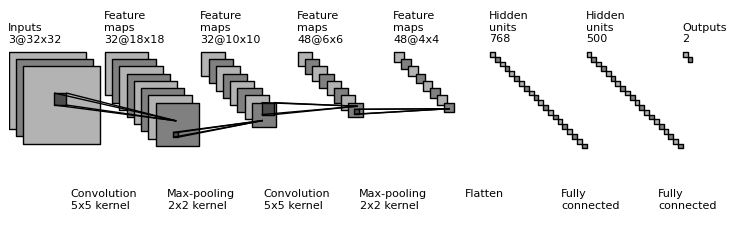

## Import data and python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [2]:
sample_size = 500
width = 100
height = 100

In [3]:
files = ['Fresh', 'Spoiled']
adress = '/kaggle/input/meat-quality-assessment-based-on-deep-learning/{}'
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

In [4]:
pd.DataFrame(data).head()

Fresh                    Spoiled
0  test_20171016_165121D.jpg  test_20171018_222121D.jpg
1  test_20171016_203521D.jpg  test_20171018_130121D.jpg
2  test_20171016_195721D.jpg  test_20171018_111521D.jpg
3  test_20171017_113721D.jpg  test_20171018_193521D.jpg
4  test_20171017_163721D.jpg  test_20171018_232321D.jpg

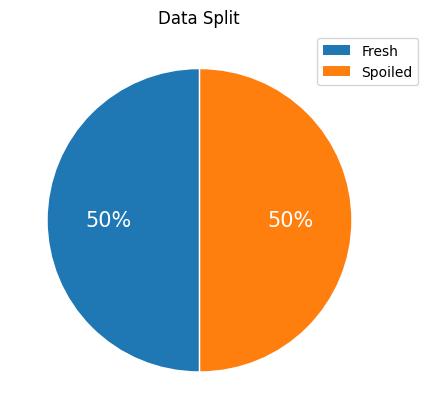

In [5]:
sizes = [len(data['Fresh']), len(data['Spoiled'])]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [6]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(adress.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class Spoiled
Calculate Time 22.42503


In [7]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(1000, 100, 100, 3)

## Data visualization

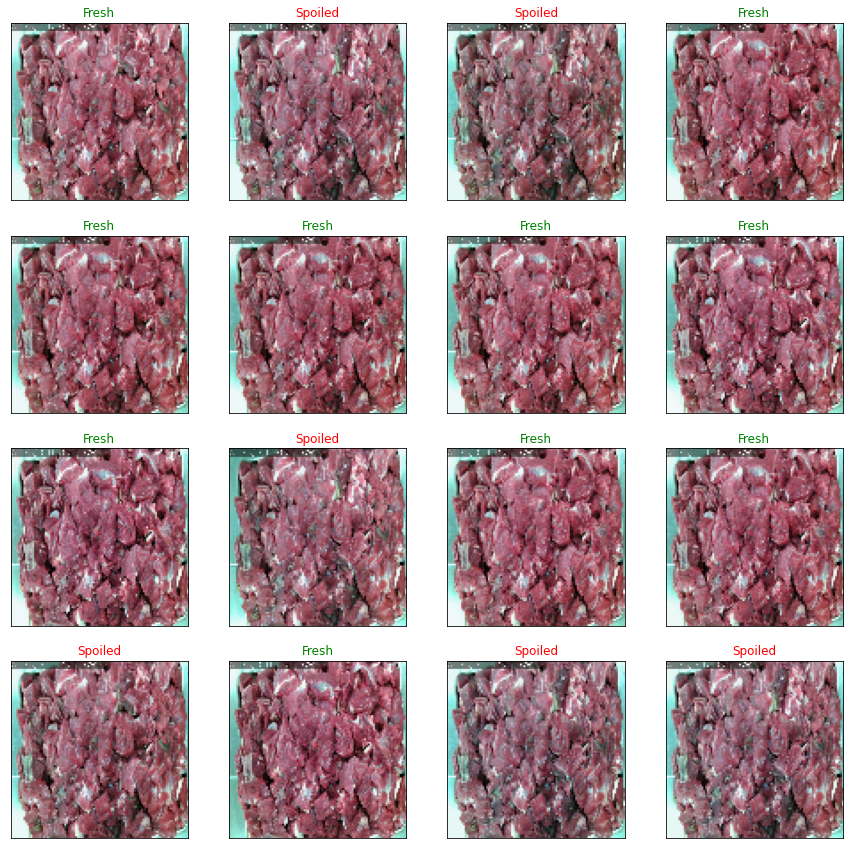

In [8]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

## Classification (CNN)

In [9]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [10]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [11]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-08-20 17:05:14.545713: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

2022-08-20 17:05:33.076883: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
22/22 [==============================] - 7s 256ms/step - loss: 0.5621 - accuracy: 0.6771 - val_loss: 0.2945 - val_accuracy: 0.9400
Epoch 2/10
22/22 [==============================] - 5s 239ms/step - loss: 0.1739 - accuracy: 0.9471 - val_loss: 0.1024 - val_accuracy: 0.9800
Epoch 3/10
22/22 [==============================] - 6s 273ms/step - loss: 0.0875 - accuracy: 0.9671 - val_loss: 0.0770 - val_accuracy: 0.9533
Epoch 4/10
22/22 [==============================] - 6s 271ms/step - loss: 0.0711 - accuracy: 0.9686 - val_loss: 0.0682 - val_accuracy: 0.9600
Epoch 5/10
22/22 [==============================] - 5s 235ms/step - loss: 0.0438 - accuracy: 0.9843 - val_loss: 0.0590 - val_accuracy: 0.9633
Epoch 6/10
22/22 [==============================] - 5s 234ms/step - loss: 0.0611 - accuracy: 0.9729 - val_loss: 0.0637 - val_accuracy: 0.9600
Epoch 7/10
22/22 [==============================] - 5s 233ms/step - loss: 0.0395 - accuracy: 0.9914 - val_loss: 0.0467 - val_accuracy: 0.9700
Epoch 

10/10 - 1s - loss: 0.0274 - accuracy: 0.9867


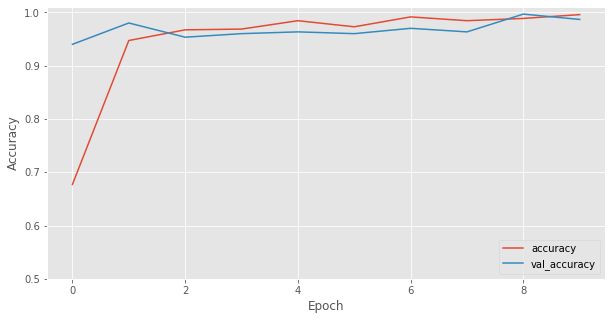

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [16]:
result=model.evaluate(test_images, test_labels)

10/10 [==============================] - 1s 78ms/step - loss: 0.0274 - accuracy: 0.9867


In [17]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.02743154764175415
accuracy : 0.9866666793823242


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 35)        980       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 35)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        20224     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

## Prediction

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

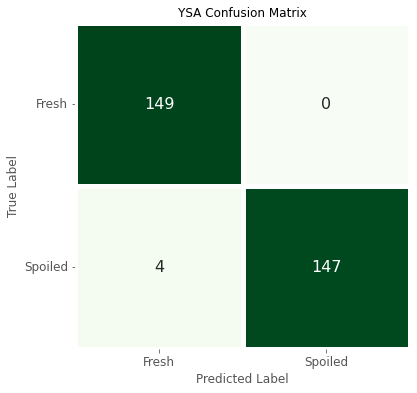

In [20]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Fresh","Spoiled"], index= ["Fresh","Spoiled"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [21]:
def Prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

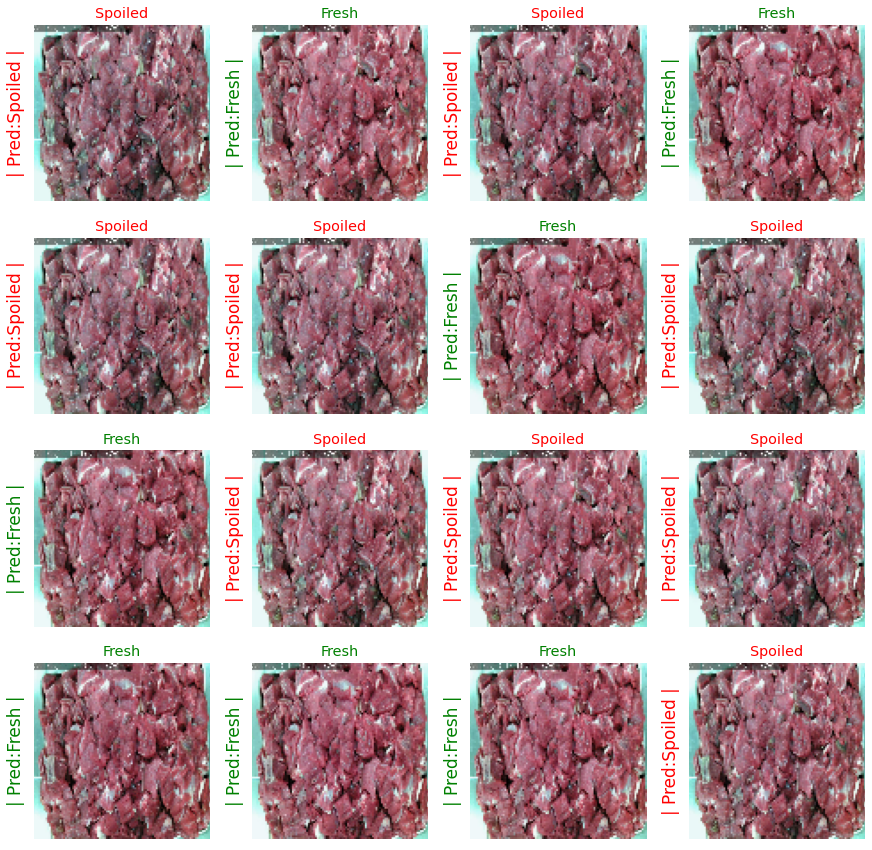

In [22]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

### We obtained an accuracy of **98.6** percent by using CNN. Let us now see another approaches and test whether the accuracy will improve or not by classifying it with another approach

# Approach Using Pytorch

In [1]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 1.5 MB/s eta 0:00:0000:0100:01


In [2]:
import timm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

from PIL import Image

from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

In [3]:
transform=transforms.Compose([transforms.Resize((224,224)),
                             transforms.ToTensor()])

In [4]:
T = torchvision.datasets.ImageFolder('../input/meat-quality-assessment-based-on-deep-learning',
                                    transform = transform)

In [5]:
T

Dataset ImageFolder
    Number of datapoints: 1896
    Root location: ../input/meat-quality-assessment-based-on-deep-learning
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [6]:
T.classes

['Fresh', 'Spoiled']

In [7]:
Train,Test = torch.utils.data.random_split(T, (round(0.8*len(T)), round(0.2*len(T)) ))
Val, Test = torch.utils.data.random_split(Test, (round(0.5*len(Test)), len(Test) - round(0.5*len(Test)) ))

In [8]:
sample, target = next(iter(Train))

In [9]:
sample.size()

torch.Size([3, 224, 224])

In [10]:
target

1

In [11]:
BATCH_SIZE = 32

train_loader = DataLoader(Train, batch_size=BATCH_SIZE, drop_last=True)
val_loader = DataLoader(Val, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(Test, batch_size=BATCH_SIZE, drop_last=True)

In [12]:
a = next(iter(train_loader))
a[0].size()

torch.Size([32, 3, 224, 224])

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [14]:
model = timm.create_model('seresnext50_32x4d', pretrained=True, num_classes=2)



model.train()

model.to(device)

error = nn.CrossEntropyLoss()
# error = nn.BCELoss() # cambiar num_classes a 1

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/seresnext50_32x4d_racm-a304a460.pth" to /root/.cache/torch/hub/checkpoints/seresnext50_32x4d_racm-a304a460.pth


In [15]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    print(f"Start of Epoch {epoch+1} of {num_epochs}")
    total_train = 0
    correct_train = 0
    
    for images, labels in train_loader:
        print('*', end='')
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(BATCH_SIZE, 3, 224, 224))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
#         m = nn.Sigmoid()
#         outputs = nn.Sigmoid(model(train))
#         loss = error(m(outputs).squeeze().to(device).type(torch.cuda.FloatTensor), labels.type(torch.cuda.FloatTensor))
        
        predictions = torch.max(outputs, 1)[1].to(device)
        correct_train += (predictions == labels).sum()
        total_train += len(labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    print(f"\nEpoch {epoch+1} of {num_epochs} Done!")
    
    # Testing the model
    
        
    total = 0
    correct = 0

    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)

        test = Variable(images.view(BATCH_SIZE, 3, 224, 224))

        outputs = model(test)

        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()

        total += len(labels)

    accuracy = correct * 100 / total
    accuracy_train = correct_train * 100 / total_train
    loss_list.append(loss.data)
    iteration_list.append(count)
    accuracy_list.append(accuracy)
        
        
    print("Epoch: {}, Loss: {}, Accuracy_test: {:.4f}%, Accuracy_train: {:.4f}%".format(epoch+1, loss.data, accuracy,accuracy_train))

Start of Epoch 1 of 5
***********************************************
Epoch 1 of 5 Done!
Epoch: 1, Loss: 0.009740402922034264, Accuracy_test: 99.3750%, Accuracy_train: 94.6809%
Start of Epoch 2 of 5
***********************************************
Epoch 2 of 5 Done!
Epoch: 2, Loss: 0.0024136763531714678, Accuracy_test: 100.0000%, Accuracy_train: 98.1383%
Start of Epoch 3 of 5
***********************************************
Epoch 3 of 5 Done!
Epoch: 3, Loss: 0.00278874346986413, Accuracy_test: 100.0000%, Accuracy_train: 98.6702%
Start of Epoch 4 of 5
***********************************************
Epoch 4 of 5 Done!
Epoch: 4, Loss: 0.0004235426604282111, Accuracy_test: 100.0000%, Accuracy_train: 99.4016%
Start of Epoch 5 of 5
***********************************************
Epoch 5 of 5 Done!
Epoch: 5, Loss: 0.13270314037799835, Accuracy_test: 98.7500%, Accuracy_train: 99.5346%


In [16]:
a = next(iter(test_loader))
model.eval()
n = 10
im_test = a[0][n]
im_test = im_test[None, :, :] #Igual a .unsqueeze() o inplace con .unsqueeze_()
R = model(im_test.to(device))
print(R.argmax(axis=1))
print(a[1][n])

tensor([0])
tensor(0)


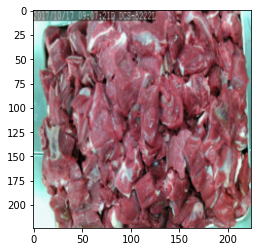

In [17]:
IMP = a[0][n].permute(1, 2, 0).numpy()
IMP.shape
plt.imshow(IMP)

In [18]:
T.classes

['Fresh', 'Spoiled']

In [19]:
T.class_to_idx

{'Fresh': 0, 'Spoiled': 1}

In [20]:
im_test = a[0]
R = model(im_test.to(device))
print(R.argmax(axis=1))
print(a[1])

tensor([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1])
tensor([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1])


In [21]:
torch.cuda.empty_cache()

In [22]:
total = 0
correct = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    labels_list.append(labels)

    test = Variable(images.view(BATCH_SIZE, 3, 224, 224))

    outputs = model(test)

    predictions = torch.max(outputs, 1)[1].to(device)
    predictions_list.append(predictions)
    correct += (predictions == labels).sum()

    total += len(labels)

accuracy = correct * 100 / total
print(f"Test accuracy: {accuracy}%")

Test accuracy: 100.0%


### So, as we can see with this approch we have received a 100% accuracy. Now just for comparison let us see another approach using transfer learning to see whether it has same accuracy or less than this

# Approach Using Tensorflow and Transfer Learning

Transfer learning is a method of reusing an already trained model for another task. The original training step is called pre-training. The general idea is that, pre-training “teaches” the model more general features, while the latter final training stage “teaches” it features specific to our own (limited) data. In this approach we have used **MobileNetV2** as pre-training model and based on this we will transfer the learnings from this model into our model and predict the result.

## Import needed modules

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

## Gather the image files into a data frame

In [2]:
sdir=r'../input/meat-quality-assessment-based-on-deep-learning'
slist=os.listdir(sdir)
classes=[]
filepaths=[]
labels=[]
for d in slist:
    dpath=os.path.join(sdir, d)
    if os.path.isdir(dpath):
        classes.append(d)
class_count=len(classes)
for klass in classes:   
    classpath=os.path.join(sdir,klass)
    filelist=os.listdir(classpath)    
    for f in filelist:
        fpath=os.path.join(classpath, f)
        filepaths.append(fpath)
        labels.append(klass)
print ('number of files: ', len(filepaths), '   number of labels: ', len(labels))
file_series=pd.Series(filepaths, name='filepaths')
label_series=pd.Series(labels, name='labels')
df=pd.concat([file_series, label_series], axis=1)
print (df.head())

number of files:  1896    number of labels:  1896
                                           filepaths labels
0  ../input/meat-quality-assessment-based-on-deep...  Fresh
1  ../input/meat-quality-assessment-based-on-deep...  Fresh
2  ../input/meat-quality-assessment-based-on-deep...  Fresh
3  ../input/meat-quality-assessment-based-on-deep...  Fresh
4  ../input/meat-quality-assessment-based-on-deep...  Fresh


## Check the balance of the dataset

In [3]:
balance=df['labels'].value_counts()
print (balance)

Fresh      948
Spoiled    948
Name: labels, dtype: int64


## Split df into train, test and valid dataframe¶

In [4]:
train_split=.8
test_split=.1
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df= train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train size: ', len(train_df), '  test size: ', len(test_df), '   valid size: ', len(valid_df))
length=len(test_df)

train size:  1516   test size:  190    valid size:  190


## Create train, test and valid generators

In [5]:
batch_size=80
def scalar(x):
    return x/127.5-1 # rescales pixels to range -1 to +1
trgen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                   batch_size=batch_size, shuffle=True, seed=123)
tvgen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=scalar)
valid_gen=tvgen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                   batch_size=batch_size, shuffle=False)
# determine test generator batch size and steps to go through the test set exactly once for predictions
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=batch_size],reverse=True)[0]  
test_steps=int(length/test_batch_size)
test_gen=tvgen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                   batch_size=test_batch_size, shuffle=False)
test_labels=test_gen.labels

Found 1516 validated image filenames belonging to 2 classes.
Found 190 validated image filenames belonging to 2 classes.
Found 190 validated image filenames belonging to 2 classes.


In [6]:
def show_training_samples(gen):
    class_dict=gen.class_indices
    new_dict={}
    # make a new dictionary with keys and values reversed
    for key, value in class_dict.items(): # dictionary is now {numeric class label: string of class_name}
        new_dict[value]=key        
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(15, 15))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=(images[i]+1 )/2 # scale images between 0 and 1 becaue pre-processor set them between -1 and +1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=new_dict[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

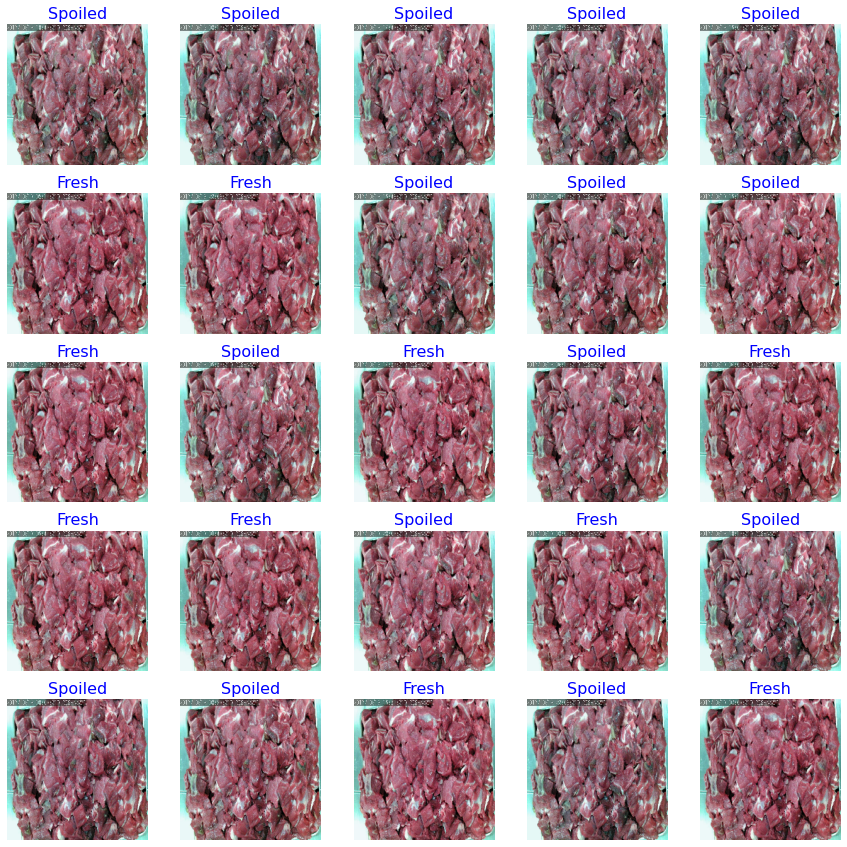

In [7]:
show_training_samples(test_gen)

## Create the model using MobilenetV2 transfer learning

In [8]:
img_shape=(224,224,3)
neurons=512
dropout=.3
lr=.001
freeze=True
base_model=tf.keras.applications.MobileNetV2( include_top=False, input_shape=img_shape, pooling='max', weights='imagenet') 
if freeze:
    base_model.trainable=False
x=base_model.output
x=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x =tf.keras.layers.Dense(neurons, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu', kernel_initializer= tf.keras.initializers.GlorotUniform(seed=123))(x)
x=tf.keras.layers.Dropout(rate=dropout, seed=123)(x)
output=tf.keras.layers.Dense(class_count, activation='softmax',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=123))(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(lr=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

2022-08-20 19:00:54.327238: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Define handy function to print text in specified RGB foreground and background colors

In [9]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

## Create subclass of Keras callbacks to control the learning rate

In [10]:
class LRA(keras.callbacks.Callback):
    def __init__(self,model, patience,stop_patience, threshold, factor, dwell, model_name, freeze,end_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.patience=patience 
        self.stop_patience=stop_patience
        self.threshold=threshold 
        self.factor=factor 
        self.dwell=dwell
        self.lr=float(tf.keras.backend.get_value(model.optimizer.lr))
        self.highest_tracc=0.0 
        self.lowest_vloss=np.inf 
        self.count=0 
        self.stop_count=0  
        self.end_epoch=end_epoch 
        best_weights=self.model.get_weights() 
        msg=' '
        if freeze==True:
            msgs=f' Starting training using  base model { model_name} with weights frozen to imagenet weights initializing LRA callback'
        else:
            msgs=f' Starting training using base model { model_name} training all layers '            
        print_in_color (msgs, (244, 252, 3), (55,65,80)) 
            
    def on_epoch_begin(self, epoch, logs=None): 
        if epoch != 0:
            msgs=f'for epoch {epoch} '
            msgs=msgs + LRA.msg
            print_in_color(msgs, (255,255,0), (55,65,80))
            
    def on_epoch_end(self, epoch, logs=None):  
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) 
        v_loss=logs.get('val_loss')  
        acc=logs.get('accuracy')  
        
        if acc < self.threshold: 
            if acc>self.highest_tracc: 
                LRA.msg= f' training accuracy improved from  {self.highest_tracc:7.4f} to {acc:7.4f} learning rate held at {lr:10.8f}'
                self.highest_tracc=acc 
                LRA.best_weights=self.model.get_weights() 
                self.count=0 
                self.stop_count=0 
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss             
            else: 
                
                if self.count>=self.patience -1:
                    self.lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space                        
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss
                    msgs=f' training accuracy {acc:7.4f} < highest accuracy of {self.highest_tracc:7.4f} '
                    LRA.msg=msgs + f' for {self.patience } epochs, lr adjusted to {self.lr:10.8f}'                    
                else:
                    self.count=self.count +1 # increment patience counter
                    LRA.msg=f' training accuracy {acc:7.4f} < highest accuracy of {self.highest_tracc:7.4f} '
                    #print_in_color(msg, (255,255,0), (55,65,80))
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            if v_loss< self.lowest_vloss: # check if the validation loss improved
                msgs=f' validation loss improved from {self.lowest_vloss:8.5f} to {v_loss:8.5}, saving best weights'
                LRA.msg=msgs + f' learning rate held at {self.lr:10.8f}'
                #print_in_color(msg, (0,255,0), (55,65,80))
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
                LRA.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved  
                self.stop_count=0                    
            else: # validation loss did not improve
                if self.count>=self.patience-1:
                    self.lr=self.lr * self.factor # adjust the learning rate
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted                    
                    msgs=f' val_loss of {v_loss:8.5f} > {self.lowest_vloss:8.5f} for {self.patience} epochs'
                    LRA.msg=msgs + f', lr adjusted to {self.lr:10.8f}'
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space
                else: 
                    self.count =self.count +1 # increment the patience counter
                    LRA.msg=f' validation loss of {v_loss:8.5f} > {self.lowest_vloss:8.5f}'
                    #print_in_color(msg, (255,255,0), (55,65,80)) 
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        if epoch==self.end_epoch:
            print_in_color(LRA.msg, (255,255,0), (55,65,80)) # print out data for the final epoch
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            LRA.msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(LRA.msg, (0,255,0), (55,65,80))
            self.model.stop_training = True # stop training

## Instantiate the custom callback

In [11]:
patience=1
stop_patience=4
threshold=.9
factor=.5
dwell=False
model_type='MobilenetV2'
epochs=6
callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_type, freeze=freeze, end_epoch=epochs - 1 )]

 Starting training using  base model MobilenetV2 with weights frozen to imagenet weights initializing LRA callback



## Train the model

In [12]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=2, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

2022-08-20 19:01:10.892170: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
19/19 - 52s - loss: 10.7144 - accuracy: 0.9301 - val_loss: 10.6225 - val_accuracy: 0.7842
Epoch 2/6
for epoch 1  validation loss improved from      inf to   10.622, saving best weights learning rate held at 0.00100000

19/19 - 41s - loss: 7.1284 - accuracy: 0.9842 - val_loss: 7.3761 - val_accuracy: 0.7263
Epoch 3/6
for epoch 2  validation loss improved from 10.62249 to   7.3761, saving best weights learning rate held at 0.00100000

19/19 - 41s - loss: 5.2146 - accuracy: 0.9888 - val_loss: 5.2807 - val_accuracy: 0.9579
Epoch 4/6
for epoch 3  validation loss improved from  7.37609 to   5.2807, saving best weights learning rate held at 0.00100000

19/19 - 41s - loss: 4.0846 - accuracy: 0.9881 - val_loss: 4.1263 - val_accuracy: 0.9684
Epoch 5/6
for epoch 4  validation loss improved from  5.28075 to   4.1263, saving best weights learning rate held at 0.00100000

19/19 - 41s - loss: 3.3254 - accuracy: 0.9934 - val_loss: 3.3372 - val_accuracy: 0.9737
Epoch 6/6
for epoch 5  validatio

## Define function to plot training results

In [13]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

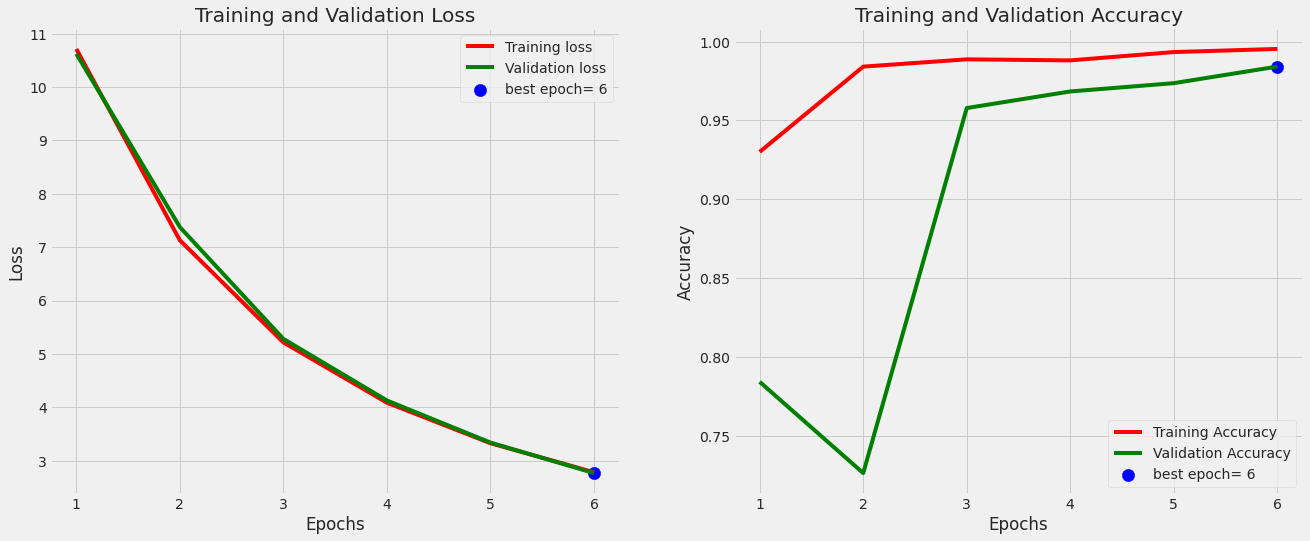

In [14]:
tr_plot(history, 0)

In [16]:
def display_eval_metrics(e_data):
    msg='Model Metrics after Training'
    print_in_color(msg, (255,255,0), (55,65,80))
    msg='{0:^24s}{1:^24s}'.format('Metric', 'Value')
    print_in_color(msg, (255,255,0), (55,65,80))
    for key,value in e_data.items():
        print (f'{key:^24s}{value:^24.5f}')
    acc=e_data['accuracy']* 100
    return acc

In [17]:
subject='meat'
save_dir = r'./'
e_dict=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=True)
acc=display_eval_metrics(e_dict)
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_type +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)
preds=model.predict(test_gen, batch_size=test_batch_size, verbose=0, steps=None)

5/5 [==============================] - 5s 836ms/step - loss: 2.7624 - accuracy: 0.9947
Model Metrics after Training

         Metric                  Value          

          loss                  2.76244         
        accuracy                0.99474         
accuracy on the test set is 99.47 %



/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [18]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(error_list[i], pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    if len(classes)<= 20:
        # create a confusion matrix and a test report        
        y_true= np.array(labels)        
        y_pred=np.array(y_pred)        
        cm = confusion_matrix(y_true, y_pred )
        clr = classification_report(y_true, y_pred, target_names=classes)
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width=length
            fig_height=length
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()    
        print("Classification Report:\n----------------------\n", clr)

          Filename                Predicted Class                True Class           Probability   

../input/meat-quality-assessment-based-on-deep-learning/Spoiled/test_20171017_191721D.jpg           Fresh                      Spoiled               0.7478



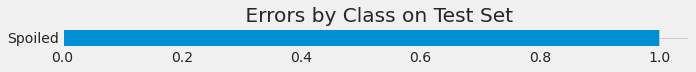

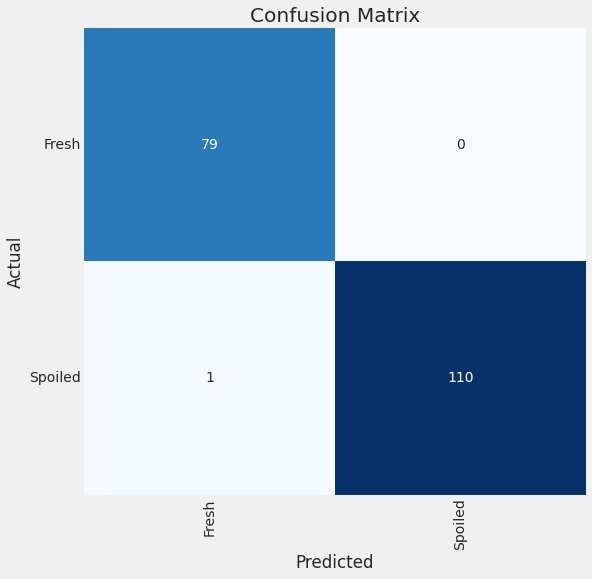

Classification Report:
----------------------
               precision    recall  f1-score   support

       Fresh       0.99      1.00      0.99        79
     Spoiled       1.00      0.99      1.00       111

    accuracy                           0.99       190
   macro avg       0.99      1.00      0.99       190
weighted avg       0.99      0.99      0.99       190



In [19]:
print_code=20
print_info( test_gen, preds, print_code, save_dir, subject)

### So here we have obtained the  accuracy  **99 percent** and in this further scope can be improved by testing different type of pre-trained models like in our approach we have used MobileNetV2 . Other Resnet can also be used for transfer learning purpose.

# Conclusion

### We have implemented three different approaches CNN,  Pytorch, And Tensorflow with transfer learning and in each case we obtained the accuracy 98.6%,100%, and 99.47% respectively which clearly indicates that Pytorch for this dataset is best among all approaches which  has been discussed in this file.
